In [1]:
# Step 1: Import Required Libraries
# ---------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix,
    classification_report
)
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
import pickle
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
df = pd.read_csv(r'C:\Users\User\Desktop\Streamlit\Titanic-Dataset.csv')

In [4]:
# Create DataFrame for easier handling


print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())


Dataset loaded successfully!
Dataset shape: (891, 12)

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C1

In [5]:
# Basic information about the dataset
print("\n1. Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")


1. Dataset Info:
Shape: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
print("\n2. Statistical Summary:")
print(df.describe())


2. Statistical Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
print("\n3. Target Distribution:")
print(df['Embarked'].value_counts())
print(f"\nPercentage distribution:")
print(df['Embarked'].value_counts(normalize=True) * 100)


3. Target Distribution:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Percentage distribution:
Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64


#  Check for Missing Values

In [8]:
# --------------------------------
print("\n4. Missing Values Check:")
missing_values = df.isnull().sum()
print(missing_values)


4. Missing Values Check:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
if missing_values.sum() == 0:
    print("✓ No missing values found in the dataset!")
else:
    print("Missing values found. Handling required.")
    # Handle missing values if any (fill with median/mode)
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            if df[column].dtype in ['float64', 'int64']:
                df[column].fillna(df[column].median(), inplace=True)
            else:
                df[column].fillna(df[column].mode()[0], inplace=True)

Missing values found. Handling required.


In [10]:

df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


df['Cabin'].fillna('Unknown', inplace=True)


print("Missing values after handling:\n", df.isnull().sum())

Missing values after handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#  Data Visualization


5. Creating Visualizations...


([0, 1, 2], [Text(0, 0, 'S'), Text(1, 0, 'C'), Text(2, 0, 'Q')])

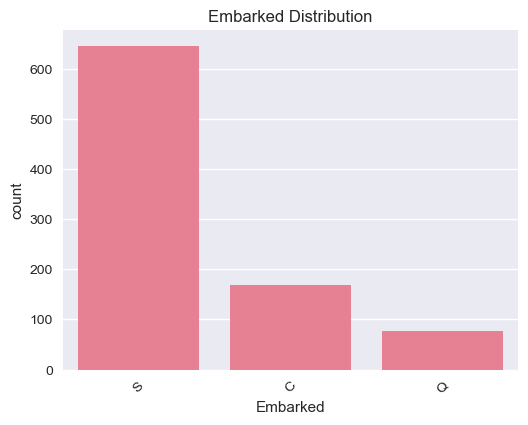

In [11]:
print("\n5. Creating Visualizations...")

# Set up the plotting area
fig = plt.figure(figsize=(20, 15))

# 1. Distribution plots
plt.subplot(3, 3, 1)
sns.countplot(data=df, x='Embarked')
plt.title('Embarked Distribution')
plt.xticks(rotation=45)

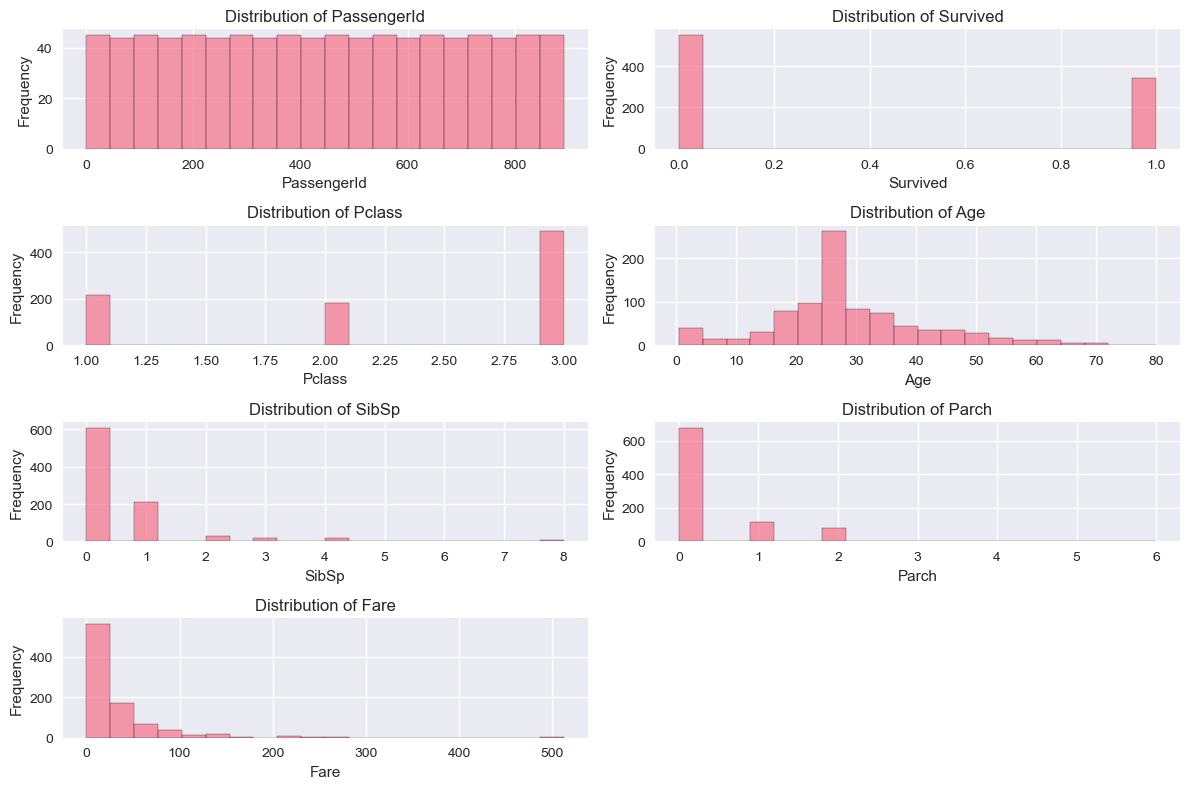

In [12]:
features = df.select_dtypes(include='number').columns

# Plot histograms for each numeric feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot((len(features) + 1) // 2, 2, i+1)  # Grid layout
    df[feature].hist(bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

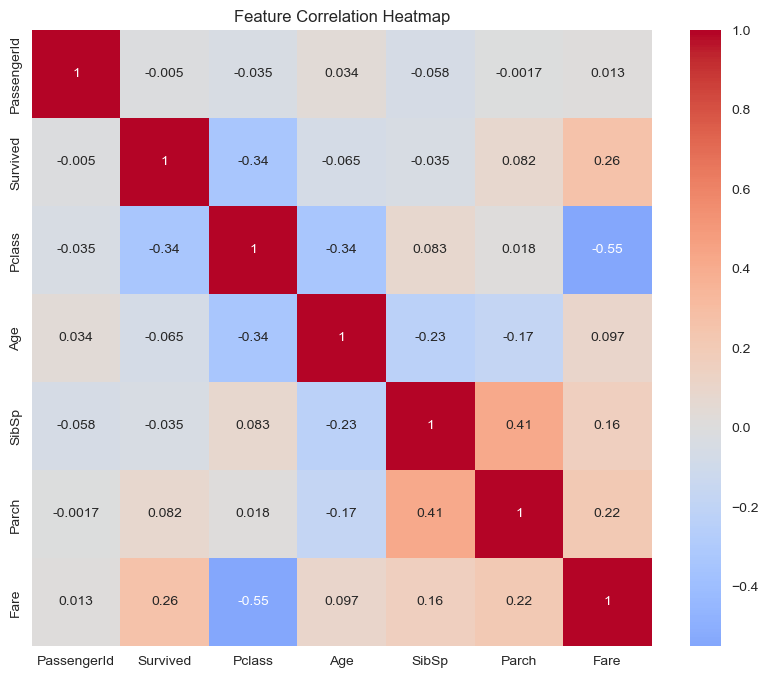

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

<Figure size 1200x1000 with 0 Axes>

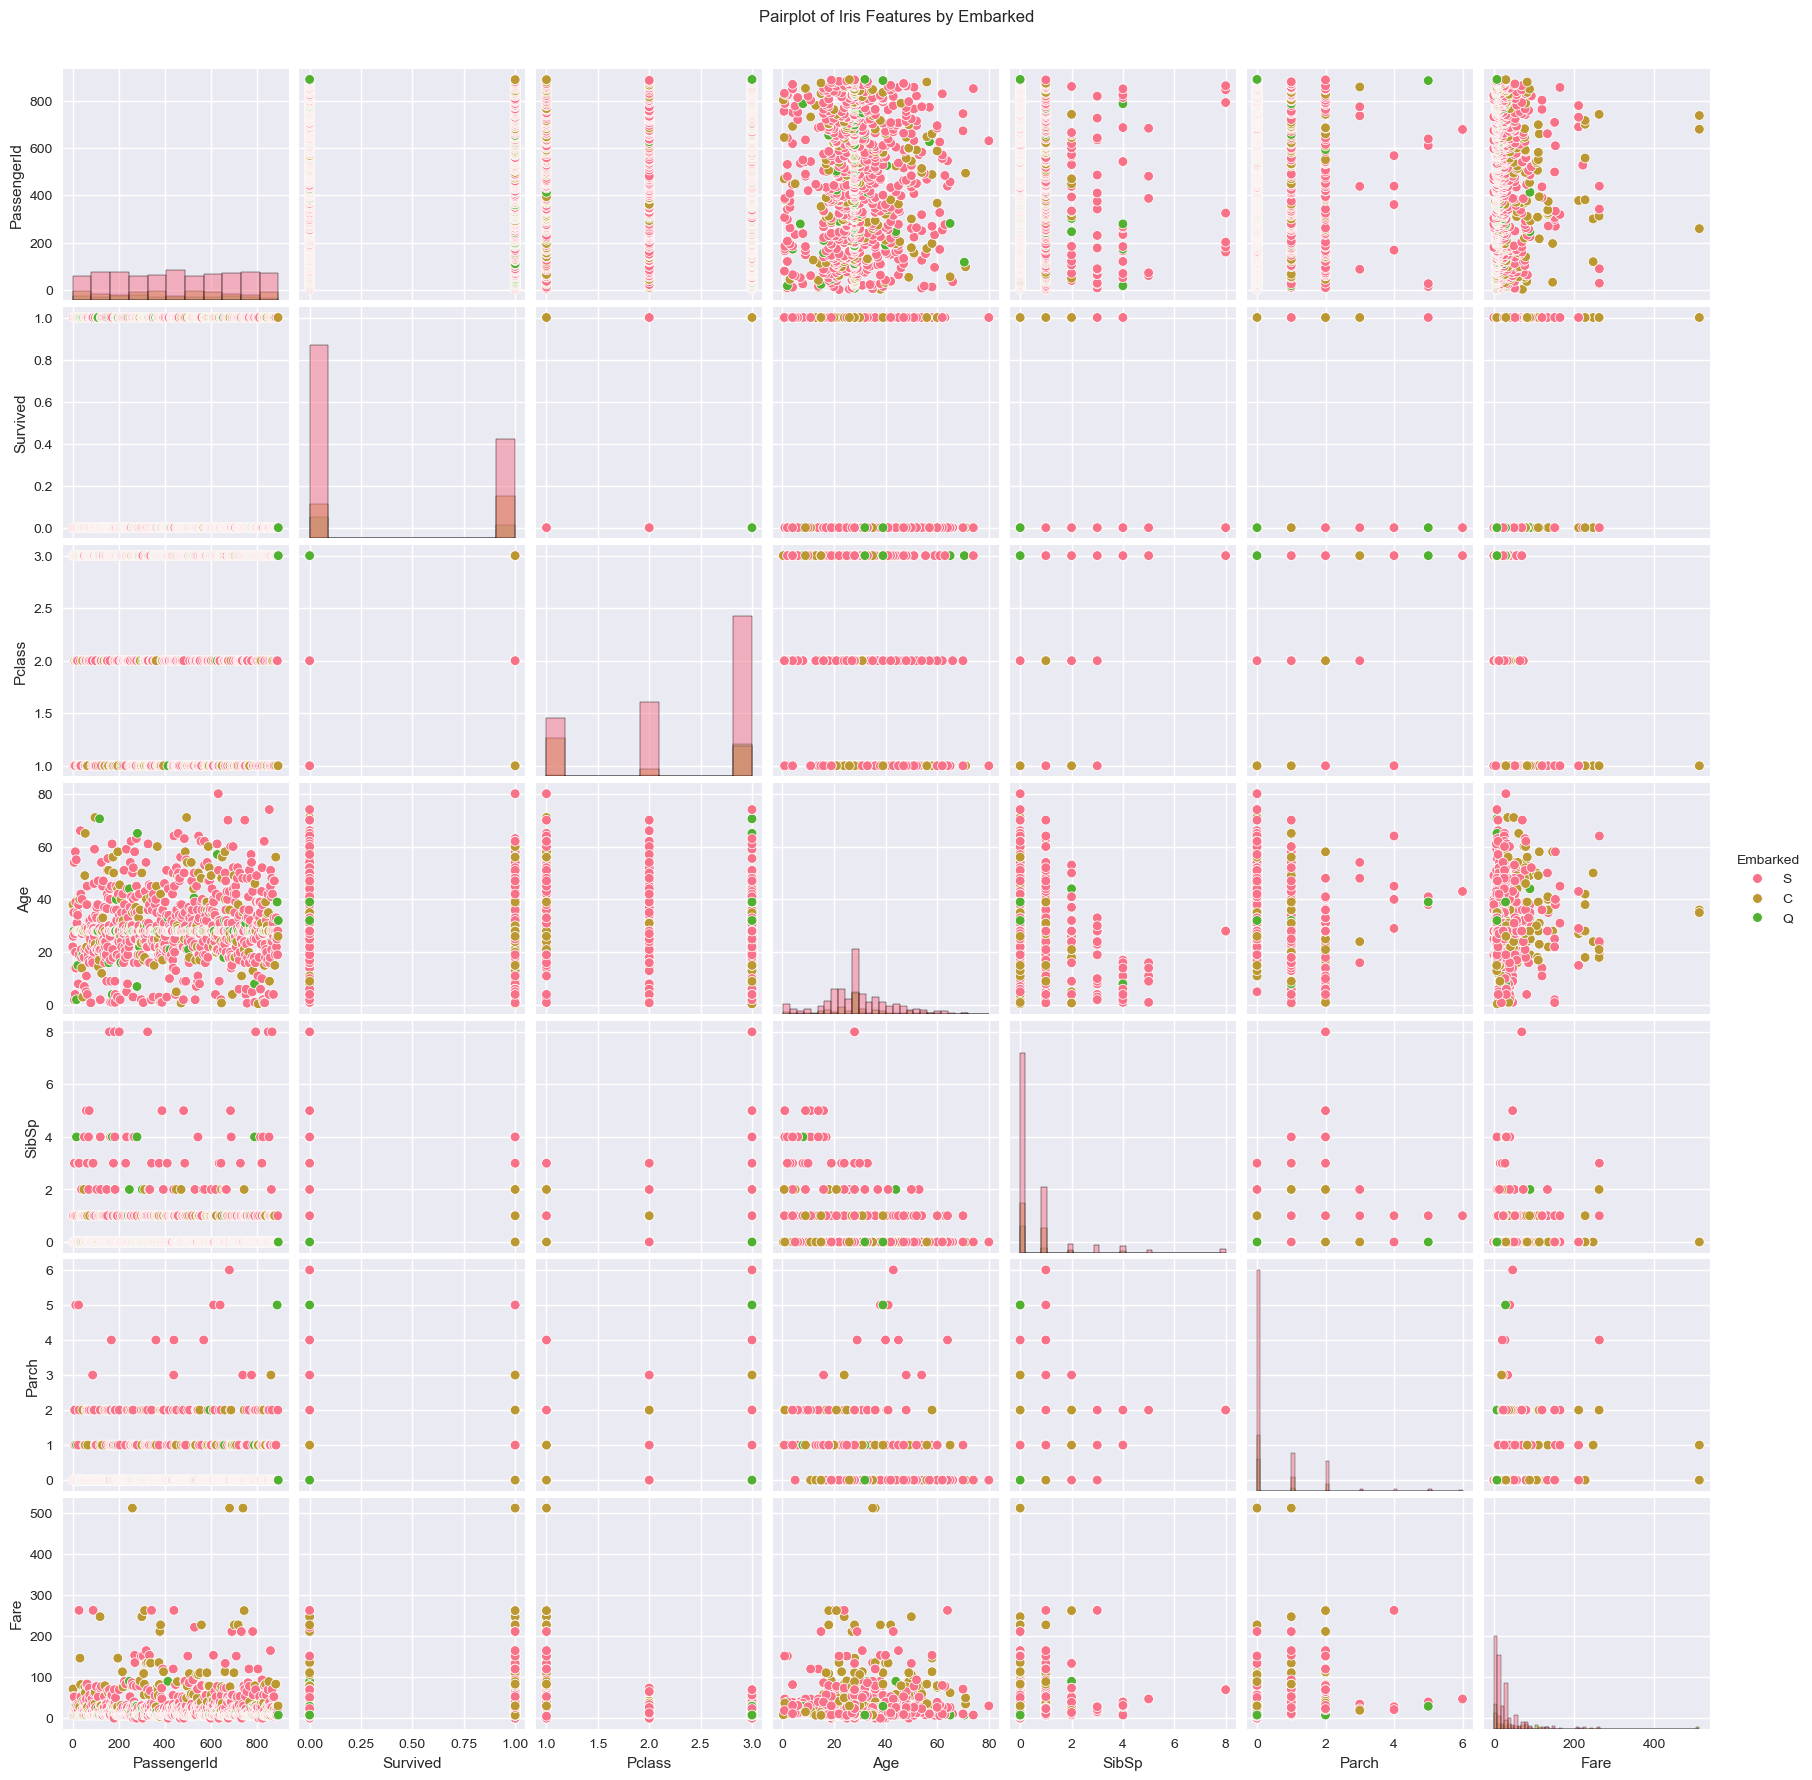

In [14]:
# Pairplot for detailed analysis
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='Embarked', diag_kind='hist')
plt.suptitle('Pairplot of Iris Features by Embarked', y=1.02)
plt.show()

# Step 6: Feature Engineering

In [15]:
# Create some new features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Including the passenger
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)  # 1 if alone, 0 otherwise
df['FarePerPerson'] = df['Fare'] / df['FamilySize']  # Adjust fare by group size

print("New features created:")
print("- FamilySize: SibSp + Parch + 1")
print("- IsAlone: 1 if passenger has no family, else 0")
print("- FarePerPerson: Fare divided by family size")

print("\nFirst 5 rows with new features:")
print(df[['FamilySize', 'IsAlone', 'FarePerPerson']].head())

New features created:
- FamilySize: SibSp + Parch + 1
- IsAlone: 1 if passenger has no family, else 0
- FarePerPerson: Fare divided by family size

First 5 rows with new features:
   FamilySize  IsAlone  FarePerPerson
0           2        0        3.62500
1           2        0       35.64165
2           1        1        7.92500
3           2        0       26.55000
4           1        1        8.05000


In [16]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

# Calculate correlation with target
correlation_with_target = df[['FamilySize', 'IsAlone', 'FarePerPerson', 'Survived']].corr()

# Display only correlation with 'Survived'
print("Correlation of new features with Survived:")
print(correlation_with_target['Survived'].sort_values(ascending=False))

Correlation of new features with Survived:
Survived         1.000000
FarePerPerson    0.221600
FamilySize       0.016639
IsAlone         -0.203367
Name: Survived, dtype: float64


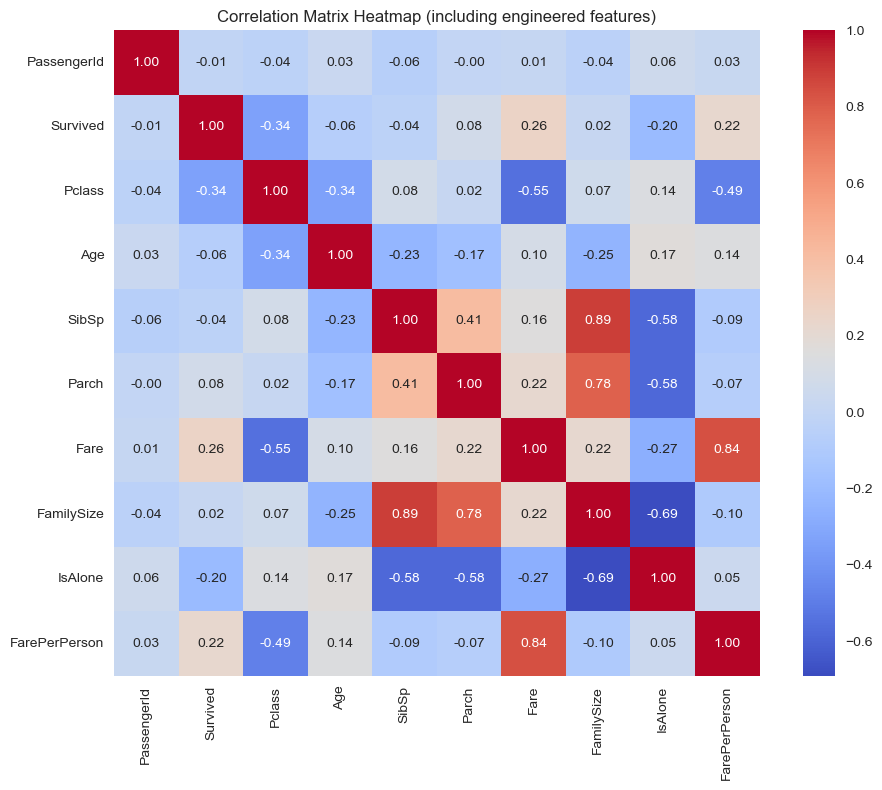

In [17]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap (including engineered features)")
plt.tight_layout()
plt.show()

# Step 7: Prepare Data for Training

In [18]:
# Select features for modeling
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Convert categorical variables to numeric (so modeling works)
df_encoded = pd.get_dummies(df[feature_cols], drop_first=True)

# Define X (features) and y (target)
X = df_encoded.values
y = df['Survived'].values

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Feature matrix shape: (891, 8)
Target vector shape: (891,)


# Step 8: Split Data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training set distribution: {np.bincount(y_train)}")
print(f"Test set distribution: {np.bincount(y_test)}")

Training set size: 712 samples
Test set size: 179 samples
Training set distribution: [439 273]
Test set distribution: [110  69]


#Step 9: Feature Scaling

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled using StandardScaler")

✓ Features scaled using StandardScaler


# Step 10: Model Training and Evaluation

In [28]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [38]:
# Drop columns that aren't useful for training
for col in ["Name", "Ticket", "Cabin"]:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

# Separate features & target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Fill missing numeric values with median
X = X.fillna(X.median(numeric_only=True))

# Fill missing categorical values with mode & encode
X = X.fillna(X.mode().iloc[0])
X = pd.get_dummies(X, drop_first=True)

# Final check to ensure no NaN remains
X = X.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("✅ Models trained successfully: Logistic Regression & Random Forest")

✅ Models trained successfully: Logistic Regression & Random Forest


# Use cross-validation for model evaluation 

In [40]:
lr_scores = cross_val_score(
    lr_model, X, y,
    scoring='neg_mean_squared_error',
    cv=5
)
lr_rmse = np.sqrt(-lr_scores)
print("LogisticRegression RMSE for each fold:", lr_rmse)
print("LogisticRegression Average RMSE:", lr_rmse.mean())

# Random Forest cross-validation
rf_scores = cross_val_score(
    rf_model, X, y,
    scoring='neg_mean_squared_error',
    cv=5
)
rf_rmse = np.sqrt(-rf_scores)
print("\nRandom Forest RMSE for each fold:", rf_rmse)
print("Random Forest Average RMSE:", rf_rmse.mean())

LogisticRegression RMSE for each fold: [0.60260144 0.54049499 0.51385304 0.49718308 0.48575205]
LogisticRegression Average RMSE: 0.5279769179520583

Random Forest RMSE for each fold: [0.59325821 0.63599873 0.57572621 0.45592233 0.51929079]
Random Forest Average RMSE: 0.5560392539520801


# Compare model performance using appropriate metrics

In [ ]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix,
    classification_report
)
# Make predictions
y_pred_lr = lr_model.predict(X_test)  
y_pred_rf = rf_model.predict(X_test)  

# Calculate metrics for Logistic Regression
print("Logistic Regression Performance:")
print("-------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# Calculate metrics for Random Forest
print("\nRandom Forest Performance:")
print("--------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Model comparison
if accuracy_score(y_test, y_pred_rf) > accuracy_score(y_test, y_pred_lr):
    print("\n✅ Random Forest performs better based on accuracy")
else:
    print("\n✅ Logistic Regression performs better based on accuracy")

Logistic Regression Performance:
-------------------------------
Accuracy: 0.771
Precision: 0.824
Recall: 0.568
F1 Score: 0.672

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       105
           1       0.82      0.57      0.67        74

    accuracy                           0.77       179
   macro avg       0.79      0.74      0.75       179
weighted avg       0.78      0.77      0.76       179

Confusion Matrix:
[[96  9]
 [32 42]]

Random Forest Performance:
--------------------------
Accuracy: 0.749
Precision: 0.699
Recall: 0.689
F1 Score: 0.694

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       105
           1       0.70      0.69      0.69        74

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179

Confusion Matri

# Select the best-performing model

In [49]:
# Model comparison & selection
if accuracy_score(y_test, y_pred_rf) > accuracy_score(y_test, y_pred_lr):
    best_model = rf_model
    best_model_name = "Random Forest"
else:
    best_model = lr_model
    best_model_name = "Logistic Regression"

print(f"\n✅ Best model selected: {best_model_name}")


✅ Best model selected: Logistic Regression


# Select the best-performing model 

In [50]:

# Save model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"✅ {best_model_name} saved as best_model.pkl")

✅ Logistic Regression saved as best_model.pkl
